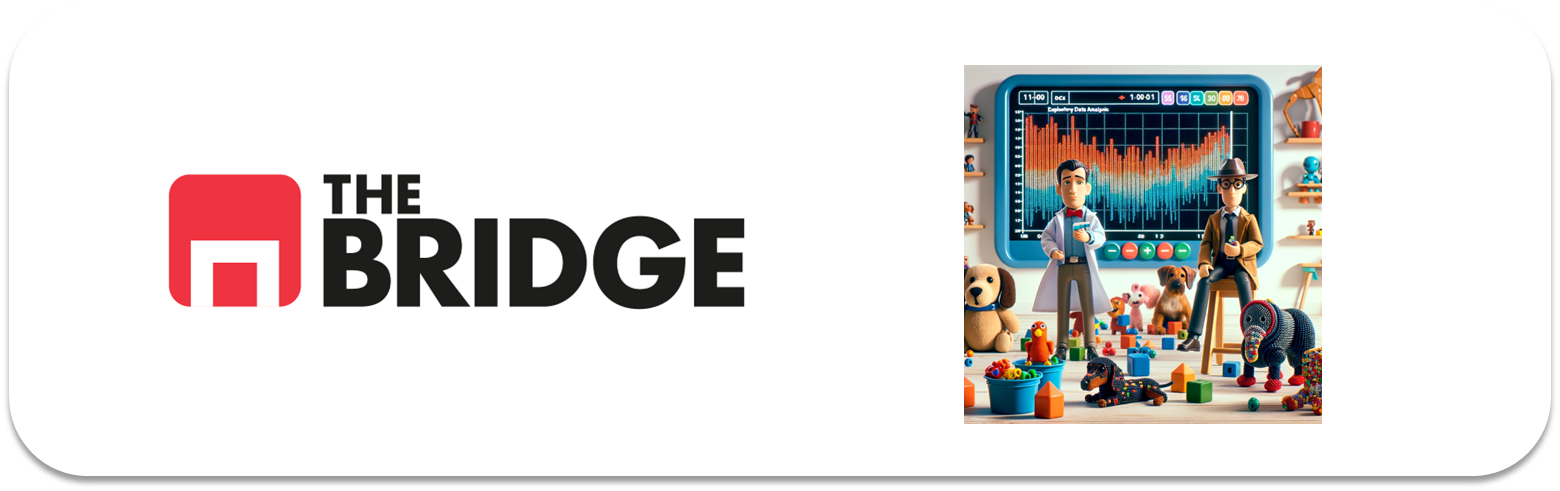

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")

from scipy import stats

import warnings

####2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [ ]:
ruta = "C:\\Users\\Asus Vivobook\\Downloads\\titanic.csv"

df_titanic = pd.read_csv(ruta)
df_titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [ ]:
columnas_a_eliminar = ["deck", "survived", "pclass", "embarked"]

df_titanic.drop(columns=columnas_a_eliminar, inplace=True)

In [ ]:
print("Columnas actuales del DataFrame:")
print(df_titanic.columns)

Columnas actuales del DataFrame:
Index(['sex', 'age', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male',
       'embark_town', 'alive', 'alone'],
      dtype='object')


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [ ]:
df_titanic['family_members'] = df_titanic['parch'] + df_titanic['sibsp']

df_titanic.drop(columns=['parch', 'sibsp'], inplace=True)

In [ ]:
df_titanic[['family_members']].head(10)

,family_members
0,1
1,1
2,0
3,1
4,0
5,0
6,0
7,4
8,2
9,1


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)

df_titanic['embark_town'].isnull().sum()

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_17808\3686423038.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['embark_town'].fillna(df_titanic['embark_town'].mode()[0], inplace=True)


np.int64(0)

### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [ ]:
df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)

df_titanic['age'].isnull().sum()

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_17808\2751543650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic['age'].fillna(df_titanic['age'].mean(), inplace=True)


np.int64(0)

In [11]:
df_titanic['age'] = df_titanic.groupby('who')['age'].transform(lambda x: x.fillna(x.mean()))

df_titanic['age'].isnull().sum()

np.int64(0)

### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

Supervivencia por sexo y edad (adulto/niño)

In [ ]:
print("Conteo de supervivientes por 'who':")
print(df_titanic.groupby('who')['alive'].value_counts())

In [ ]:
# Relativos (%)
print("\nPorcentaje de supervivencia por 'who':")
print(df_titanic.groupby('who')['alive'].value_counts(normalize=True) * 100)

Supervivencia por clase chic uadrado

In [ ]:
tabla_class = pd.crosstab(df_titanic['class'], df_titanic['alive'])
chi2, p, dof, ex = chi2_contingency(tabla_class)
print(f"\nChi-cuadrado 'class' vs 'alive': p-value = {p:.5f}")

Conteo de supervivientes por clase:
class   alive
First   yes      136
        no        80
Second  no        97
        yes       87
Third   no       372
        yes      119
Name: count, dtype: int64

Porcentaje de supervivencia por clase:
class   alive
First   yes      62.962963
        no       37.037037
Second  no       52.717391
        yes      47.282609
Third   no       75.763747
        yes      24.236253
Name: proportion, dtype: float64


NameError: name 'chi2_contingency' is not defined

Supervivencia por ciudad de embarque

Relación entre precio del billete y supervivencia

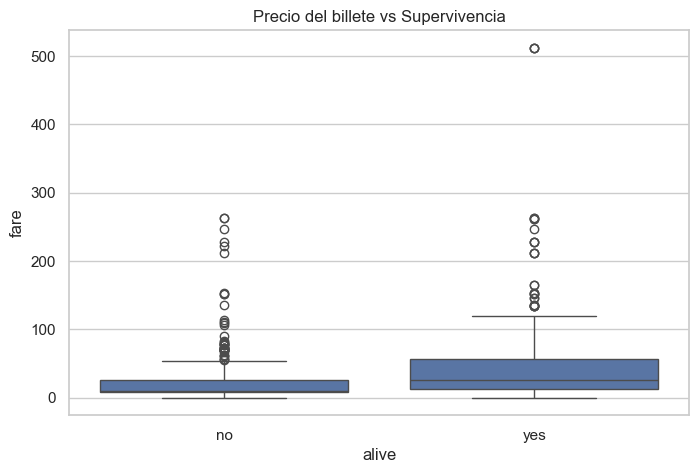

       count       mean        std  min      25%   50%   75%       max
alive                                                                 
no     549.0  22.117887  31.388207  0.0   7.8542  10.5  26.0  263.0000
yes    342.0  48.395408  66.596998  0.0  12.4750  26.0  57.0  512.3292


In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='alive', y='fare', data=df_titanic)
plt.title("Precio del billete vs Supervivencia")
plt.show()

# Estadísticas descriptivas
print(df_titanic.groupby('alive')['fare'].describe())


Pasajeros con billete 0 y el más caro

In [ ]:
#no pagaron lo suficiente 
gratis = df_titanic[df_titanic['fare'] == 0]
print("Pasajeros con billete 0:")
print(gratis)

In [ ]:
max_fare = df_titanic['fare'].max()
print(f"\nPasajero que más pagó: {max_fare}")
print(df_titanic[df_titanic['fare'] == max_fare])

Pasajeros con billete 0:
      sex        age  fare   class  who  adult_male  embark_town alive  alone  \
179  male  36.000000   0.0   Third  man        True  Southampton    no   True   
263  male  40.000000   0.0   First  man        True  Southampton    no   True   
271  male  25.000000   0.0   Third  man        True  Southampton   yes   True   
277  male  29.699118   0.0  Second  man        True  Southampton    no   True   
302  male  19.000000   0.0   Third  man        True  Southampton    no   True   
413  male  29.699118   0.0  Second  man        True  Southampton    no   True   
466  male  29.699118   0.0  Second  man        True  Southampton    no   True   
481  male  29.699118   0.0  Second  man        True  Southampton    no   True   
597  male  49.000000   0.0   Third  man        True  Southampton    no   True   
633  male  29.699118   0.0   First  man        True  Southampton    no   True   
674  male  29.699118   0.0  Second  man        True  Southampton    no   True   
732

Relación entre dinero, ciudad y supervivencia

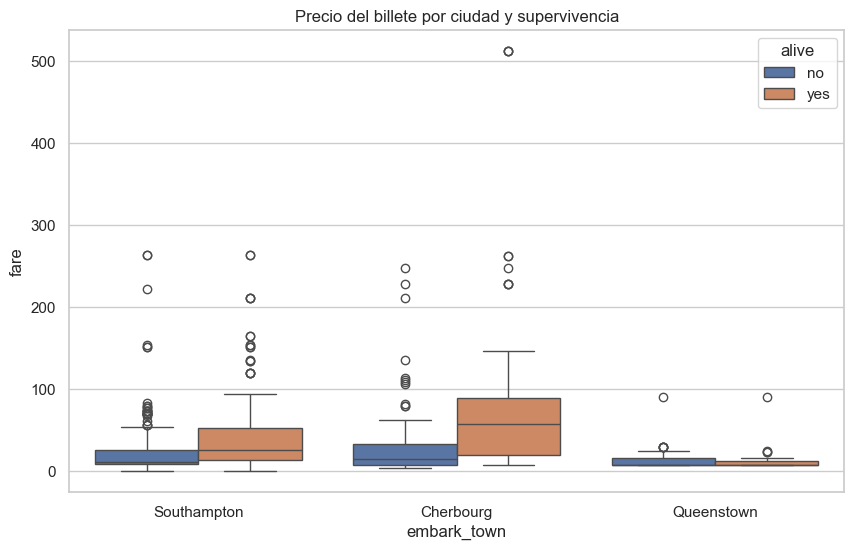

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x='embark_town', y='fare', hue='alive', data=df_titanic)
plt.title("Precio del billete por ciudad y supervivencia")
plt.show()

Supervivencia según clase y edad

In [ ]:
df_titanic['age_group'] = pd.cut(df_titanic['age'], bins=[0,12,18,35,60,100], labels=['child','teen','young_adult','adult','senior'])

tabla_class_age = pd.crosstab([df_titanic['class'], df_titanic['age_group']], df_titanic['alive'])
print(tabla_class_age)

In [ ]:
tabla_class_age_pct = tabla_class_age.div(tabla_class_age.sum(axis=1), axis=0)
print("\nPorcentaje de supervivencia por clase y grupo de edad:")
print(tabla_class_age_pct)

alive                no  yes
class  age_group            
First  child          1    3
       teen           1   11
       young_adult   32   64
       adult         35   55
       senior        11    3
Second child          0   17
       teen           6    6
       young_adult   60   45
       adult         29   18
       senior         2    1
Third  child         28   20
       teen          33   13
       young_adult  254   80
       adult         53    5
       senior         4    1

Porcentaje de supervivencia por clase y grupo de edad:
alive                     no       yes
class  age_group                      
First  child        0.250000  0.750000
       teen         0.083333  0.916667
       young_adult  0.333333  0.666667
       adult        0.388889  0.611111
       senior       0.785714  0.214286
Second child        0.000000  1.000000
       teen         0.500000  0.500000
       young_adult  0.571429  0.428571
       adult        0.617021  0.382979
       senior       0.

Relación entre edad, coste del billete y supervivencia

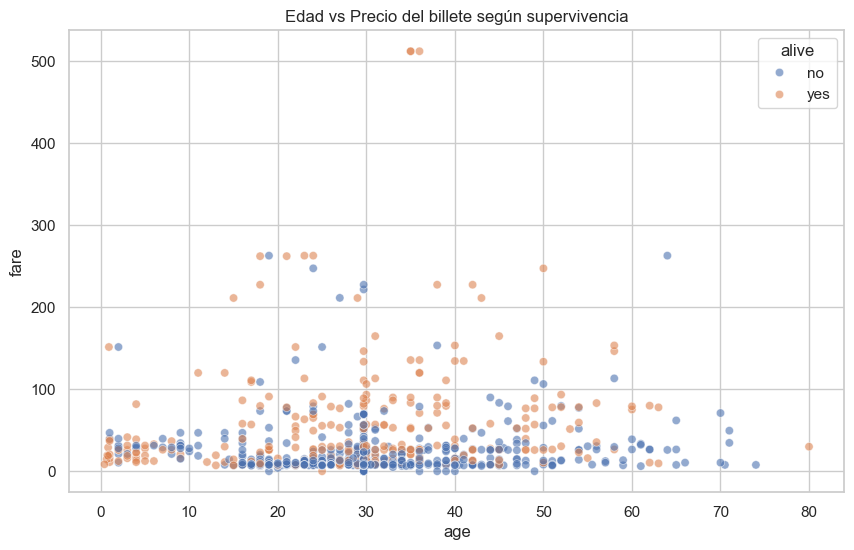

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='age', y='fare', hue='alive', data=df_titanic, alpha=0.6)
plt.title("Edad vs Precio del billete según supervivencia")
plt.show()

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

In [ ]:
ruta = r"C:\Users\Asus Vivobook\Downloads\titanic.csv"
df_viajes = pd.read_csv(ruta)

mapping = {
    "Duración": "Age",
    "Destino": "Embarked",
    "Costo": "Fare",}
for nuevo, original in mapping.items():
    if nuevo not in df_viajes.columns and original in df_viajes.columns:
        df_viajes[nuevo] = df_viajes[original]

In [ ]:
print("Primeras filas:")
display(df_viajes.head())

print("\nInformación general del DataFrame:")
df_viajes.info()

print("\nResumen estadístico de variables numéricas:")
display(df_viajes.describe())

print("\nNúmero de valores únicos por columna:")
display(df_viajes.nunique())

In [ ]:
if "Duración" in df_viajes.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df_viajes["Duración"].dropna(), kde=True, bins=20, color="#78C850", alpha=0.7)
    plt.title("Distribución de la duración de viajes")
    plt.xlabel("Duración")
    plt.ylabel("Frecuencia / Densidad")
    plt.show()

if "Destino" in df_viajes.columns:
    plt.figure(figsize=(10,5))
    sns.countplot(x="Destino", data=df_viajes, palette="Set2")
    plt.xticks(rotation=45)
    plt.title("Número de viajes por destino")
    plt.xlabel("Destino")
    plt.ylabel("Cantidad")
    plt.show()

In [ ]:
if {"Costo", "Duración"}.issubset(df_viajes.columns):
    sns.lmplot(x="Costo", y="Duración", data=df_viajes, fit_reg=True, height=5, aspect=1.2)
    plt.title("Relación entre costo y duración del viaje")
    plt.show()



Primeras filas:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True



Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB

Resumen estadístico de variables numéricas:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Número de valores únicos por columna:


survived         2
pclass           3
sex              2
age             88
sibsp            7
parch            7
fare           248
embarked         3
class            3
who              3
adult_male       2
deck             7
embark_town      3
alive            2
alone            2
dtype: int64

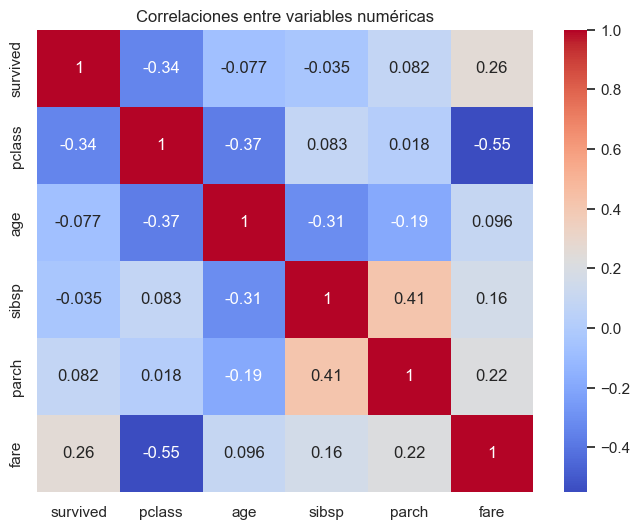


Hipótesis interesantes a explorar:
- Los viajes más caros son más largos.
- Hay destinos que concentran la mayoría de los viajes.
- La temporada influye en la duración o costo.
- El número de viajeros puede correlacionar con el costo total.



In [ ]:
# Correlaciones solo sobre columnas numéricas
corr = df_viajes.select_dtypes(include="number").corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables numéricas")
plt.show()


### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [ ]:
df = pd.read_csv(ruta, encoding="utf-8", na_values=["", "NA", "NaN", None]) #no comilla

In [ ]:
df.columns = df.columns.str.lower().str.strip() #minuscu

In [ ]:
print("Columnas:", df.columns.tolist())
print(df.head(3))

Columnas: ['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala', 'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes']
  aircompany   origen      destino  distancia        avion  con_escala  \
0     Airnar    París      Ginebra        411   Boeing 737       False   
1       FlyQ     Bali         Roma      12738   Boeing 737        True   
2   TabarAir  Ginebra  Los Angeles       9103  Airbus A380       False   

      consumo_kg  duracion   ingresos        id_vuelo    mes  
0    1028.691900        51   14232.65  Air_PaGi_10737  Jun23  
1   33479.132544      1167  468527.19  Fly_BaRo_10737  Jun23  
2  109439.907200       626  584789.19  Tab_GiLo_11380  Jun23  


Picos de concentración (una compañía con muchos más viajes).

Desalineación entre volumen (viajes) e ingresos (medianas altas/bajas).

La posición de TabarAir (¿tiene menos ingresos por viaje? ¿menos viajes? ¿está por debajo de la mediana del sector?).

##1 PIPELINE DE NORMALIZACION Y ORDENAMIENTO PARA QUE FUNCIONEN LOS GRAFOS(ANEXO)

número de viajes por compañía

In [ ]:
    plt.figure(figsize=(10, 5))
    sns.countplot(x="aircompany", data=df_count, order=order_count, palette="Set2")
    plt.xticks(rotation=45, ha="right")
    plt.title("Número de viajes por compañía (junio)")
    plt.xlabel("Compañía aérea"); plt.ylabel("Cantidad de viajes")
    plt.tight_layout(); plt.show()

IndentationError: expected an indented block after 'if' statement on line 8 (4231344591.py, line 9)

boxplot ingresos por compañía

In [ ]:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="aircompany", y="ingresos", data=df_box, order=order_box, palette="Set3")
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribución de ingresos por compañía (junio)")
    plt.xlabel("Compañía aérea"); plt.ylabel("Ingresos")
    plt.tight_layout(); plt.show()

puntos individuales

Columnas: ['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala', 'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes']
Primeras filas:


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23



Filas totales: 600 | Filas de junio detectadas: 0
⚠️ No se detectaron filas de junio. Revisa la columna 'mes' o la fecha. Se mostrarán gráficos con TODOS los datos.
Filas para countplot: 600 | Filas para box/strip (con ingresos): 600


C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_18684\4115621897.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="aircompany", data=df_count, order=order_count, palette="Set2")


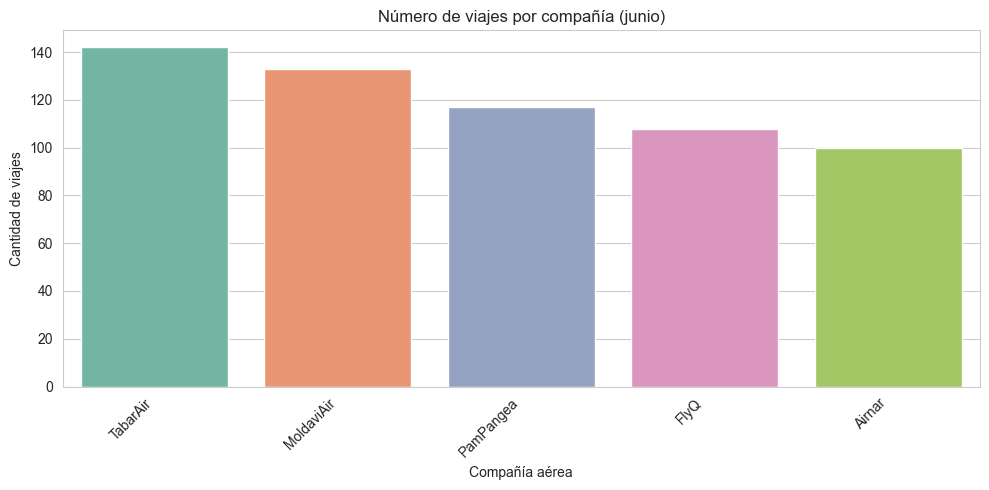

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_18684\4115621897.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="aircompany", y="ingresos", data=df_box, order=order_box, palette="Set3")


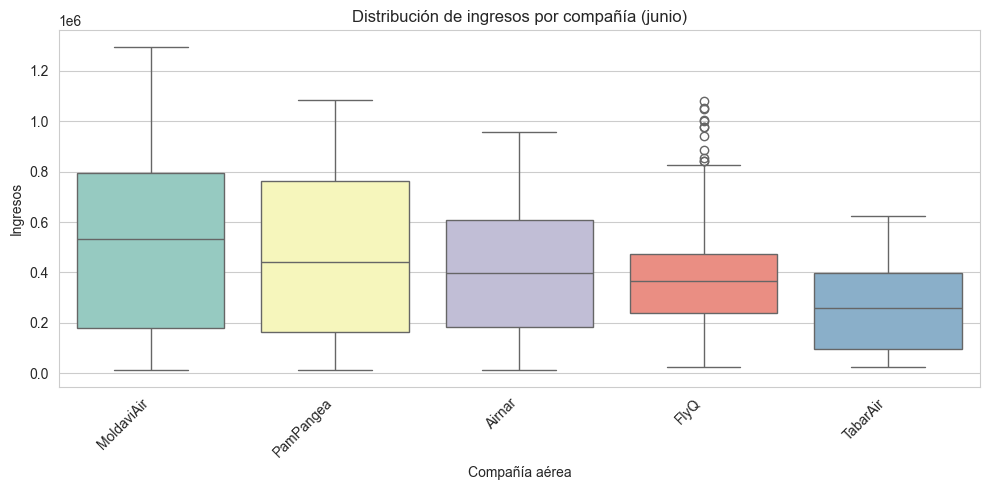

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_18684\4115621897.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x="aircompany", y="ingresos", data=df_box, order=order_box,


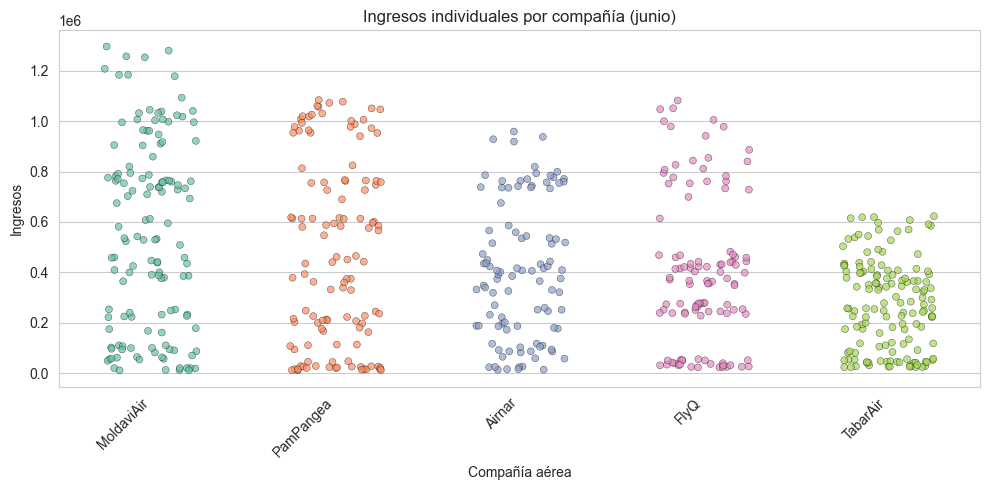

In [ ]:
    plt.figure(figsize=(10, 5))
    sns.stripplot(x="aircompany", y="ingresos", data=df_box, order=order_box,palette="Set2", alpha=0.7, jitter=0.25, edgecolor="k", linewidth=0.3)
    plt.xticks(rotation=45, ha="right")
    plt.title("Ingresos individuales por compañía (junio)")
    plt.xlabel("Compañía aérea"); plt.ylabel("Ingresos")
    plt.tight_layout(); plt.show()

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

viajes por compañía

In [ ]:
if len(df_count) > 0:
    order_count = df_count["aircompany"].value_counts().index.tolist()
    plt.figure(figsize=(10,5))
    sns.countplot(x="aircompany", data=df_count, order=order_count, palette="Set2")
    plt.xticks(rotation=45, ha="right")
    plt.title("Número de viajes por compañía" + (" (junio)" if "mes" in df.columns else ""))
    plt.xlabel("Compañía aérea"); plt.ylabel("Cantidad de viajes")
    plt.tight_layout(); plt.show()

if len(df_bi) > 0:
  
    order_box = ( df_bi.groupby("aircompany")["ingresos"]
        .median()
        .sort_values(ascending=False)
        .index.tolist() )

Boxplot ingresos por compañía

In [ ]:

    plt.figure(figsize=(10,5))
    sns.boxplot(x="aircompany", y="ingresos", data=df_bi, order=order_box, palette="Set3")
    plt.xticks(rotation=45, ha="right")
    plt.title("Distribución de ingresos por compañía" + (" (junio)" if "mes" in df.columns else ""))
    plt.xlabel("Compañía aérea"); plt.ylabel("Ingresos")
    plt.tight_layout(); plt.show()

In [ ]:
Scatter ingresos vs distancia

In [ ]:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=col_dist, y="ingresos", data=df_bi, alpha=0.6)
    sns.regplot(x=df_bi[col_dist], y=df_bi["ingresos"], scatter=False, color="k", line_kws={"lw":1})
    plt.title(f"Ingresos vs {col_dist}")
    plt.tight_layout(); plt.show()

Scatter ingresos vs consumo_kg


Columnas: ['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala', 'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes']
Primeras 3 filas:


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23



Filas totales: 600 | Filas de junio detectadas: 0
⚠️ No se detectaron filas de junio. Se usarán TODOS los datos para no dejar las gráficas en blanco.
Filas para countplot: 600
Filas con ingresos válidos: 600


C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_17808\3198962403.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="aircompany", data=df_count, order=order_count, palette="Set2")


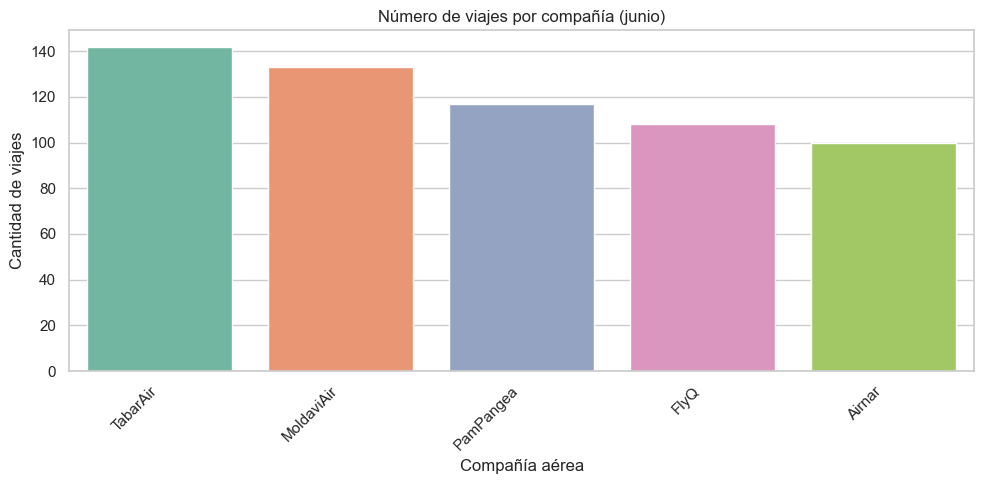

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_17808\3198962403.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="aircompany", y="ingresos", data=df_bi, order=order_box, palette="Set3")


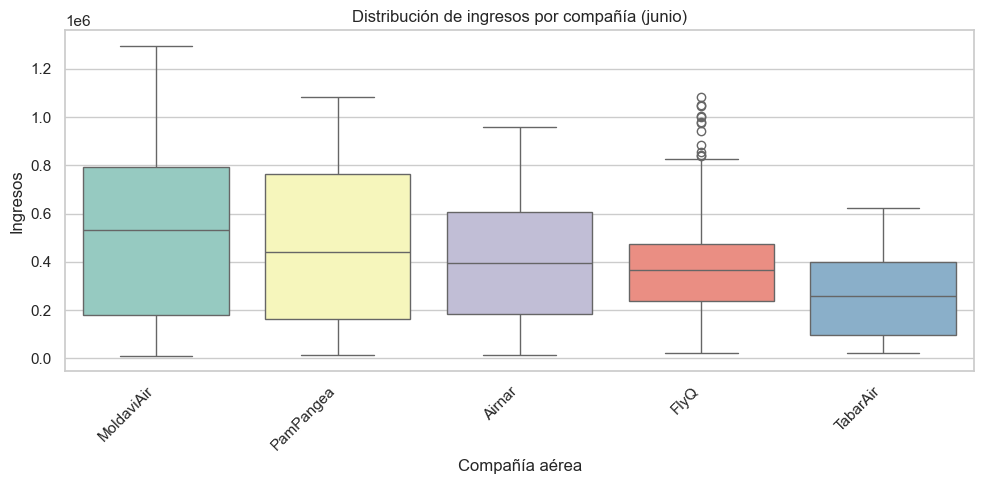

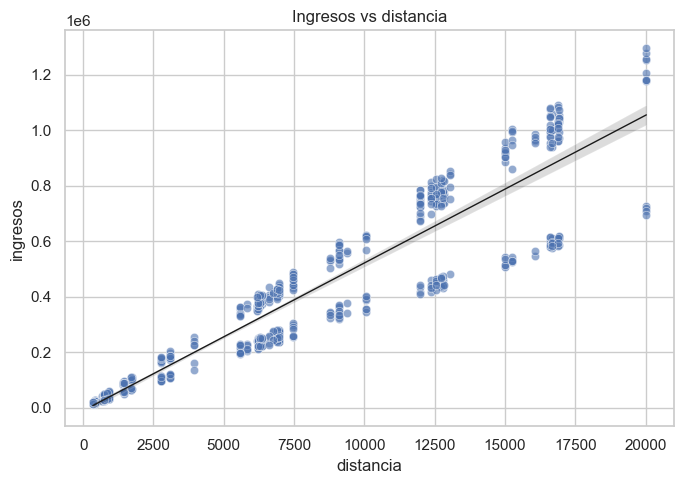

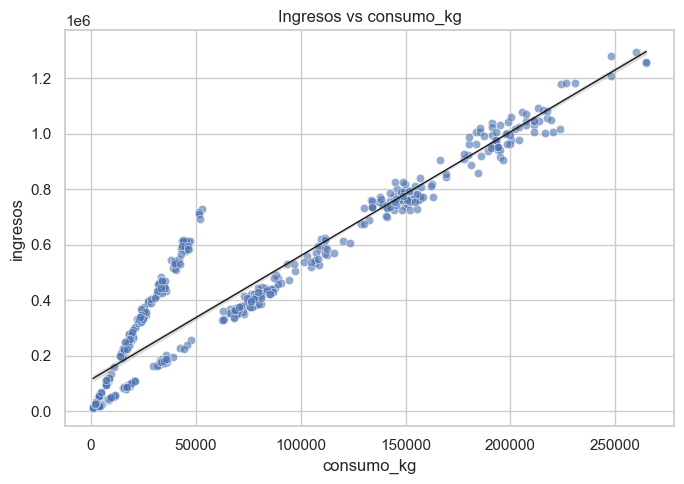

In [ ]:
    plt.figure(figsize=(7,5))
    sns.scatterplot(x="consumo_kg", y="ingresos", data=df_bi, alpha=0.6)
    sns.regplot(x=df_bi["consumo_kg"], y=df_bi["ingresos"], scatter=False, color="k", line_kws={"lw":1})
    plt.title("Ingresos vs consumo_kg")
    plt.tight_layout(); plt.show()

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

Acotacions, categorías de vuelo según distribución de distancia

In [ ]:
q = 4

sub["cat_vuelo"] = pd.qcut(sub["distancia"], q=q,
                           labels=[f"C{idx+1}" for idx in range(q)])
if q == 4:
    sub["cat_vuelo"] = sub["cat_vuelo"].cat.rename_categories(["Corto", "Medio", "Largo", "Muy largo"])
elif q == 3:
    sub["cat_vuelo"] = sub["cat_vuelo"].cat.rename_categories(["Corto", "Medio", "Largo"])



In [ ]:
print("\nConteo por categoría:")
print(sub["cat_vuelo"].value_counts().to_string())

 cuartiles (4 categorías). Cambia a q=3 si prefieres 3 categorías.

Tablas comparativas por categoría

In [ ]:
agg = sub.groupby("cat_vuelo", observed=True).agg(
    n=("ingresos", "size"),
    ingresos_media=("ingresos", "mean"),
    ingresos_mediana=("ingresos", "median"),
    consumo_media=("consumo_kg", "mean"),
    consumo_mediana=("consumo_kg", "median"),
    distancia_media=("distancia", "mean")
).sort_index()
print("\nResumen por cat_vuelo:")
print(agg.round(2).to_string())

GRAFICOS

Distribución de distancia con cortes

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(sub["distancia"], bins=20, kde=True, alpha=0.7)
plt.title("Distribución de distancia (con categorías por cuantiles)")
plt.xlabel("distancia"); plt.ylabel("Frecuencia")
plt.tight_layout(); plt.show()

Ingresos por categoría 

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(x="cat_vuelo", y="ingresos", data=sub, palette="Set3")
sns.stripplot(x="cat_vuelo", y="ingresos", data=sub, color="k", alpha=0.4, jitter=0.25)
plt.title("Ingresos por categoría de vuelo")
plt.xlabel("cat_vuelo"); plt.ylabel("ingresos")
plt.tight_layout(); plt.show()

Consumo por categoría

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(x="cat_vuelo", y="consumo_kg", data=sub, palette="Set2")
sns.stripplot(x="cat_vuelo", y="consumo_kg", data=sub, color="k", alpha=0.4, jitter=0.25)
plt.title("Consumo (kg) por categoría de vuelo")
plt.xlabel("cat_vuelo"); plt.ylabel("consumo_kg")
plt.tight_layout(); plt.show()

Scatter ingresos vs distancia coloreado por categoría

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="distancia", y="ingresos", hue="cat_vuelo", data=sub, palette="tab10", alpha=0.75)
sns.regplot(x=sub["distancia"], y=sub["ingresos"], scatter=False, color="k", line_kws={"lw":1})
plt.title("Ingresos vs distancia (color: cat_vuelo)")
plt.tight_layout(); plt.show()

X = pd.get_dummies(sub[["distancia", "consumo_kg", "cat_vuelo"]], columns=["cat_vuelo"], drop_first=True)


In [ ]:
y = sub["ingresos"].values
lin = LinearRegression().fit(X, y)
y_hat = lin.predict(X)
r2 = r2_score(y, y_hat)

Resumen distancia (para decidir cortes):
count      600.000000
mean      8071.003333
std       5550.244086
min        344.000000
25%       3073.000000
50%       6877.000000
75%      12553.000000
max      20029.000000

Conteo por categoría:
cat_vuelo
Corto        170
Largo        157
Muy largo    142
Medio        131

Resumen por cat_vuelo:
             n  ingresos_media  ingresos_mediana  consumo_media  consumo_mediana  distancia_media
cat_vuelo                                                                                        
Corto      170        69372.75          50949.40       10325.61          7191.91          1388.79
Medio      131       305331.33         277928.68       44962.79         44145.19          6185.19
Largo      157       524261.03         461570.18       84527.93         87710.48          9970.05
Muy largo  142       825074.34         848798.06      141041.89        167982.76         15710.92


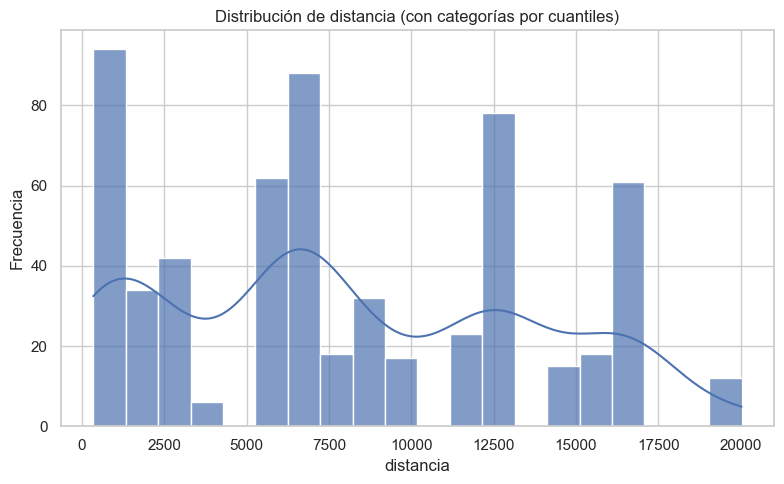

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_17808\4095259327.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cat_vuelo", y="ingresos", data=sub, palette="Set3")


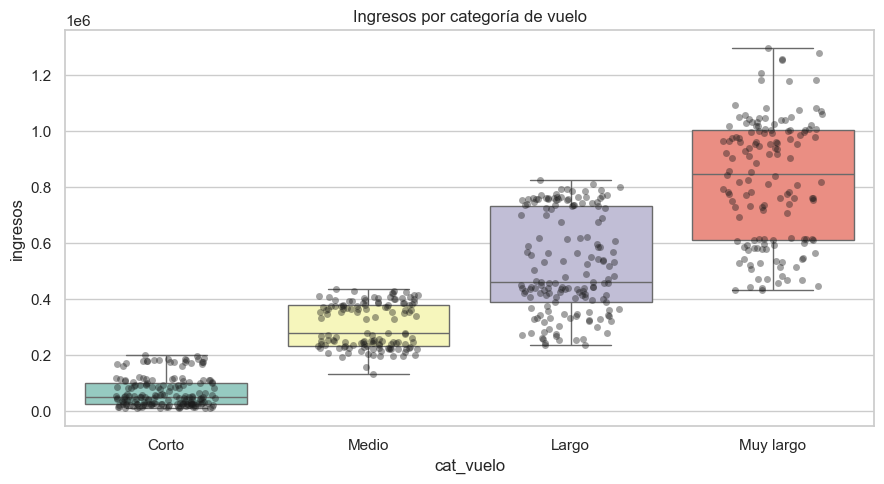

C:\Users\Asus Vivobook\AppData\Local\Temp\ipykernel_17808\4095259327.py:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cat_vuelo", y="consumo_kg", data=sub, palette="Set2")


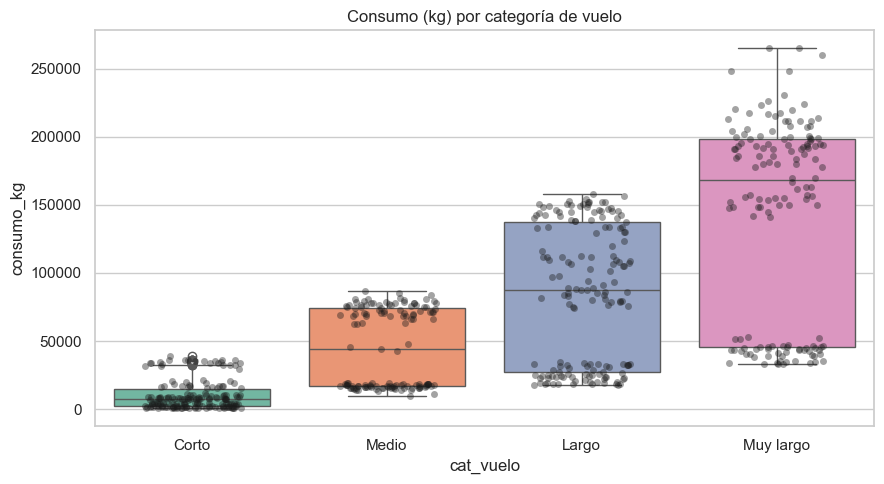

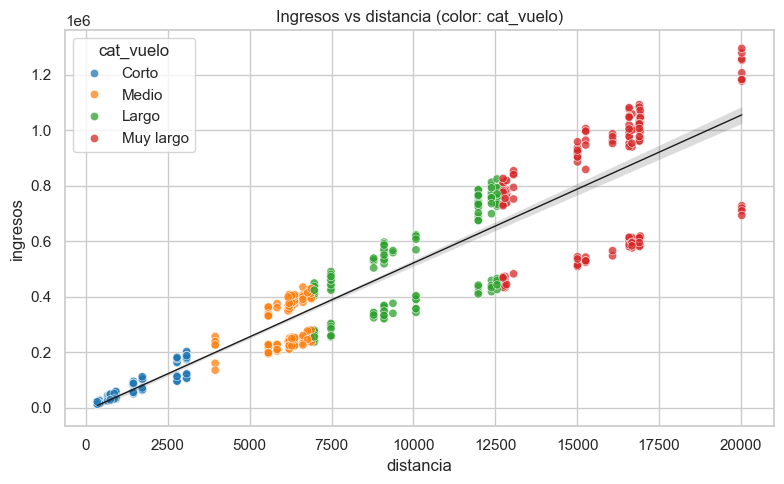


Modelo lineal con dummies de 'cat_vuelo': ingresos ~ distancia + consumo_kg + cat_vuelo_*
R² (in-sample, exploratorio): 0.9969

Coeficientes:
distancia                 28.6082
consumo_kg                 2.6751
cat_vuelo_Medio         6085.6792
cat_vuelo_Largo        10898.3207
cat_vuelo_Muy largo    -3702.2807


In [ ]:

print("\nModelo lineal con dummies de 'cat_vuelo': ingresos ~ distancia + consumo_kg + cat_vuelo_*")
print("R² (in-sample, exploratorio):", round(r2, 4))
coefs = pd.Series(lin.coef_, index=X.columns).round(4)
print("\nCoeficientes:")
print(coefs.to_string())


ANEXO 

In [8]:
sns.set_style("whitegrid")


ruta = r"C:\Users\Asus Vivobook\Downloads\dataset_viajes_jun23.csv"
df = pd.read_csv(ruta, encoding="utf-8", na_values=["", "NA", "NaN", None])
df.columns = df.columns.str.lower().str.strip()

print("Columnas:", df.columns.tolist())
print("Primeras 3 filas:")
display(df.head())

Columnas: ['aircompany', 'origen', 'destino', 'distancia', 'avion', 'con_escala', 'consumo_kg', 'duracion', 'ingresos', 'id_vuelo', 'mes']
Primeras 3 filas:


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23


Integeramos y cambiamos , x .

In [9]:
def to_numeric_series(s):
    s = s.astype(str).str.strip()
    s = s.str.replace(r"[^0-9,\.\-]", "", regex=True)         
    more_commas = s.str.count(",") > s.str.count("\.")
    s = np.where(more_commas, s.str.replace(",", ".", regex=False), s)  
    return pd.to_numeric(s, errors="coerce")



In [10]:
df["ingresos"] = to_numeric_series(df["ingresos"]) if df["ingresos"].dtype == object else pd.to_numeric(df["ingresos"], errors="coerce")
df[col_dist] = pd.to_numeric(df[col_dist], errors="coerce")
df["consumo_kg"] = pd.to_numeric(df["consumo_kg"], errors="coerce")

Filtramos Junio

In [11]:
df_junio = df.copy()
if "mes" in df.columns:
    mes_raw = df["mes"].astype(str).str.lower().str.strip()
    mes_num = pd.to_numeric(mes_raw.str.lstrip("0"), errors="coerce")
    es_junio = (mes_num == 6) | mes_raw.isin(["junio", "june", "jun"])
    df_junio = df[es_junio].copy()

In [6]:
#Usamos air_company

df_count = df_junio.dropna(subset=["aircompany"]).copy()

df_bi = df_junio.dropna(subset=["aircompany", "ingresos"]).copy()


In [12]:
print(f"Filas para countplot: {len(df_count):,}")
print(f"Filas con ingresos válidos: {len(df_bi):,}")


display(df_junio.head(10))

Filas para countplot: 0
Filas con ingresos válidos: 0


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes


ERROR CORREC.

Acepta solo la palabra “junio” tal cual, pero si te digo “junio 2023” ya no vale.

In [14]:
print(df["mes"].head(20))
print(df["mes"].value_counts(dropna=False).head(20))


0     Jun23
1     Jun23
2     Jun23
3     Jun23
4     Jun23
5     Jun23
6     Jun23
7     Jun23
8     Jun23
9     Jun23
10    Jun23
11    Jun23
12    Jun23
13    Jun23
14    Jun23
15    Jun23
16    Jun23
17    Jun23
18    Jun23
19    Jun23
Name: mes, dtype: object
mes
Jun23    600
Name: count, dtype: int64


Quédate con todas las filas donde, en la columna mes,aparezca la palabra ‘jun’ en cualquier parte del texto.

In [15]:
mes_raw = df["mes"].astype(str).str.lower()
es_junio = mes_raw.str.contains("jun", na=False)
df_junio = df[es_junio].copy()


In [16]:
df_count = df_junio.dropna(subset=["aircompany"]).copy()
df_bi    = df_junio.dropna(subset=["aircompany", "ingresos"]).copy()


In [17]:
print(f"Filas para countplot: {len(df_count):,}")
print(f"Filas con ingresos válidos: {len(df_bi):,}")


display(df_junio.head(10))

Filas para countplot: 600
Filas con ingresos válidos: 600


,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
5,MoldaviAir,Cádiz,Melbourne,20029,Boeing 737,True,53148.153240,1721,728045.68,Mol_CaMe_10737,Jun23
6,MoldaviAir,París,Londres,344,Airbus A320,False,915.246400,44,13805.52,Mol_PaLo_11320,Jun23
7,PamPangea,París,Melbourne,16925,Airbus A380,True,217722.658400,1328,1056735.47,Pam_PaMe_11380,Jun23
8,PamPangea,Nueva York,Bali,16589,Boeing 737,True,45277.618464,1459,600836.96,Pam_NuBa_10737,Jun23
9,Airnar,Ginebra,Cádiz,1725,Airbus A380,False,20339.820000,135,110108.07,Air_GiCa_11380,Jun23
